In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.18.5'

## Data
We generate two normally distributed data sets. One containing 10000 number of Twitter followers, and one number of Facebook friends. The mean and standard deviation for both data sets are fictional, but roughly what both companies report in 2012.

In [4]:
# Draw 10000 samples from a normal distribution of Twitter followers
twitter_mu = 208.0
twitter_sigma = 60.0
twitter_followers = np.random.normal(twitter_mu, twitter_sigma, 10000)

# show first 12 samples
twitter_followers[:12]

array([202.61903206, 226.29416879, 169.15149205,  97.92017183,
       290.31241878, 106.63151351, 160.80767598, 306.51451252,
       177.55903107, 226.41960315, 144.95181254, 130.50638443])

In [5]:
# Draw 10000 samples from a normal distribution of Facebook friends
facebook_mu = 190.0
facebook_sigma = 36.0
facebook_friends = np.random.normal(facebook_mu, facebook_sigma, 10000)

# show first 12 samples
facebook_friends[:12]

array([223.79663304, 251.41554289, 176.38584178, 118.67194202,
       238.11906527, 215.20744364, 260.6387279 , 168.85024888,
       161.45698422, 136.11457261, 161.66747332, 270.51245274])

## Normal Distribution
Both Twitter followers and Facebook friends distributions follow a normal distribution.

D:\1\a3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\1\a3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


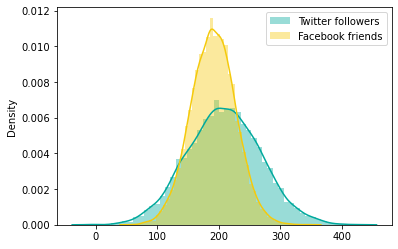

In [6]:
# Distribution plot of both normal distributions
sns.distplot(twitter_followers, label='Twitter followers')
sns.distplot(facebook_friends, label='Facebook friends')
c=plt.legend()

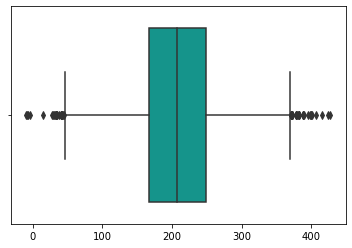

In [11]:
# Boxplot of the distributions
# Note the sub zero twitter folowers
# c=sns.boxplot([twitter_followers, facebook_friends], 
#             names=['Twitter followers', 'Facebook friends'])

c = sns.boxplot(x= twitter_followers)


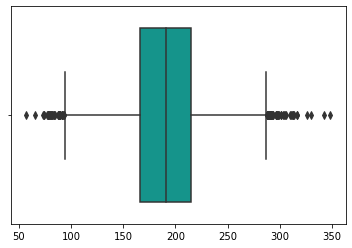

In [12]:
c = sns.boxplot(x = facebook_friends)

## The Standard Normal Distribution
To compare or re-map values of a normal distribution, we need to calculate the z-scores. All z-scores fall on the standard normal distribution, with a mean of 0 and a standard deviation of 1:

$$z=\frac{x-\mu}{\sigma}$$

To map back to the original value (in this case Facebook friends or Twitter followers):

$$x=z\cdot\sigma+\mu$$ 

(seriously, it seems small, but is significant - take note)

In [13]:
# Calculate the z-scores for Twitter followers
z_scores_twitter = stats.mstats.zscore(twitter_followers)
z_scores_twitter[:12]

array([-0.0870755 ,  0.30973538, -0.6480135 , -1.84189732,  1.3827234 ,
       -1.6958895 , -0.78786135,  1.65428116, -0.50709761,  0.31183774,
       -1.05361606, -1.29573095])

In [14]:
# Calculate the z-scores for Facebook friends
z_scores_facebook = stats.mstats.zscore(facebook_friends)
z_scores_facebook[:12]

array([ 0.92248488,  1.68848023, -0.39242747, -1.99309091,  1.3197097 ,
        0.68426841,  1.94428022, -0.60142302, -0.80647117, -1.50932909,
       -0.80063337,  2.21812258])

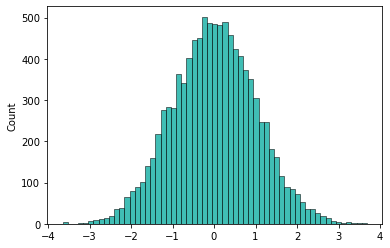

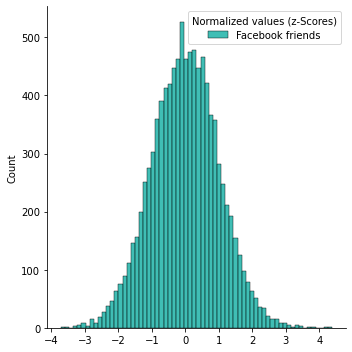

In [18]:
# Distribution plot of the normalized distributions
# sns.distplot(z_scores_twitter, label='Twitter followers')
# sns.distplot(z_scores_facebook, label='Facebook friends')
sns.histplot(z_scores_twitter, label='Twitter followers') # remove the distplot warning using histplot
sns.displot(z_scores_facebook, label='Facebook friends') # another way to remove the distplot warning using displot
c=plt.legend(title='Normalized values (z-Scores)')

<AxesSubplot:>

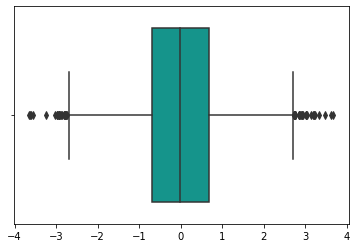

In [20]:
# Boxplot of the normalized distributions
# c=sns.boxplot([z_scores_twitter, z_scores_facebook],
#             names=['Twitter followers', 'Facebook friends'])

sns.boxplot(x = z_scores_twitter)

<AxesSubplot:>

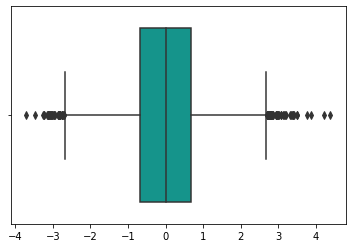

In [21]:
sns.boxplot(x = z_scores_facebook)

## Mapping to other distributions
Now we have our normalized distributions, we can do some mapping from one to the other. Let's say I wanted to know roughly the equivalent of Facebook friends, given a number of Twitter followers. I can calculate this by using the Standard Normal Distribution (z scores).

In [22]:
# First calculate the z score for my number of Twitter followers
me_twitter_followers = 92.0
me_twitter_zscore = (me_twitter_followers - twitter_mu) / twitter_sigma
me_twitter_zscore

-1.9333333333333333

In [24]:
# Than map the z score to a Facebook friends equivalent
me_equiv_facebook_friends = me_twitter_zscore * facebook_sigma + facebook_mu # this is important - keep note
me_equiv_facebook_friends

120.4